In [1]:
import numpy as np # for complx mathematical operation
import pandas as pd  # for data frame manipulation
import matplotlib.pyplot as plt # for creating data visulization
import seaborn as sns #for creating data visulization
from ipywidgets import interact # for interactive analysis & also helps in interacting with python

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\PROJECTS\AGROWW\dataset\Crop_recommendation.csv")

In [3]:
data.shape

(2200, 8)

In [27]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [29]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [31]:
# Check the minimum and maximum values for each column
limits = data.describe().loc[['min', 'max']]
print("Lower and Upper Limits of Each Column:")
print(limits)


Lower and Upper Limits of Each Column:
         N      P      K  temperature   humidity        ph    rainfall
min    0.0    5.0    5.0     8.825675  14.258040  3.504752   20.211267
max  140.0  145.0  205.0    43.675493  99.981876  9.935091  298.560117


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [35]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [37]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [39]:
data["crop"].value_counts()

crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [21]:
#Let spilit the Dataset for Predictive Modelling
y=data['crop'] # Storing label in Y varriable
x=data.drop(['crop'], axis=1)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [41]:
data["crop"].value_counts()

crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [25]:
#Lets create Training and Testing Sets for validation of Results
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0) # 80% Data will be alotted into trainins set & remaining 20% will be sent into testing set
print("The Shape of x train:", x_train.shape)
print("The Shape of x test:",x_test.shape)
print("The Shape of y train:",y_train.shape)
print("The Shape of y test",y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test (440,)


In [27]:
#target Variable - Type of Fertilizer
crop = data['crop'].unique()
print("Number of crops: ",len(crop))
print("List of crops: ",crop)

Number of crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


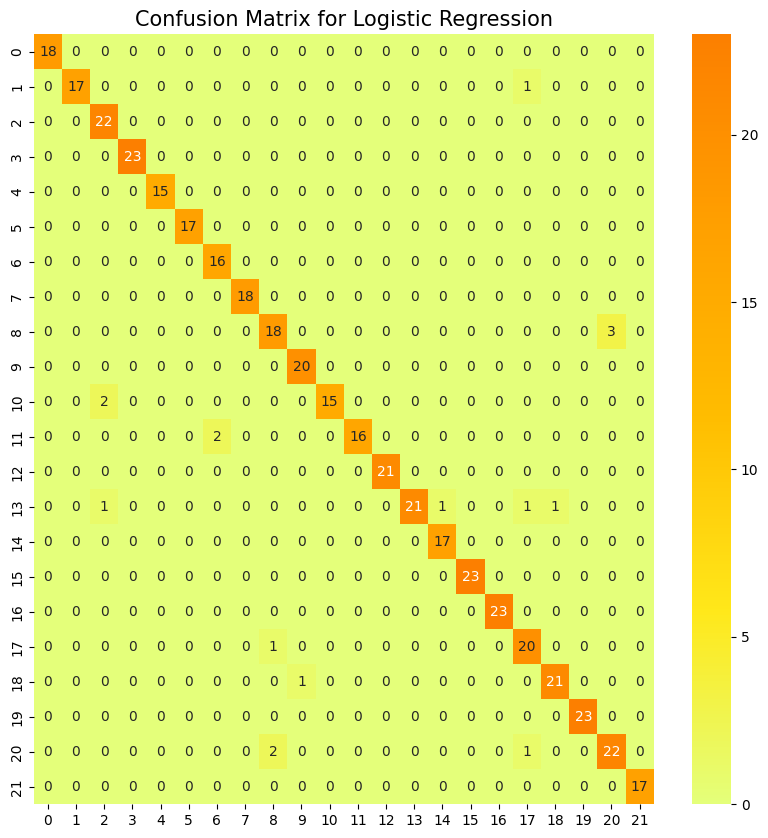

In [29]:
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression from SKlearn to make our predective model

model = LogisticRegression(solver = 'liblinear') # Storing our Algorithm in varriable name model
model.fit(x_train, y_train) # Our model hase been trained from the data stored into training data set, Our model is fully trained now , further function used to predection
y_pred = model.predict(x_test) #  we predict our model for x_test data set and further stored it into y_pred variable

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True, cmap ='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [30]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [31]:
prediction = model.predict((np.array([[90,# 90 for Nitrogen
                                      40, # 40 for Phosphorous
                                      40, # 40 for Pota
                                      20, # 20 for temperature
                                      80, # 80 for humidity
                                      7 , # 7 for ph
                                      200]])))  # 200 for rainfal
print("The suggested crop for given climatic condition is:", prediction)
                           #Now time to check the output is rice or not

The suggested crop for given climatic condition is: ['rice']


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(x_test)

# Evaluate the model
rf_accuracy = rf_model.score(x_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9977272727272727


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=0)

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(x_test)

# Evaluate the model
dt_accuracy = dt_model.score(x_test, y_test)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.9886363636363636


In [39]:
from sklearn.svm import SVC

svm_model = SVC()

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(x_test)

# Evaluate the model
svm_accuracy = svm_model.score(x_test, y_test)
print(f'SVM Model Accuracy: {svm_accuracy}')

SVM Model Accuracy: 0.9772727272727273


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with a chosen number of neighbors (e.g., k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions
knn_y_pred = knn_model.predict(x_test)

# Evaluate the model
knn_accuracy = knn_model.score(x_test, y_test)
print(f'KNN Model Accuracy: {knn_accuracy}')

KNN Model Accuracy: 0.9772727272727273


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=0)

# Train the model
gb_model.fit(x_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(x_test)

# Evaluate the model
gb_accuracy = gb_model.score(x_test, y_test)
print(f'Gradienr Boosting Accuracy: {gb_accuracy}')

Gradienr Boosting Accuracy: 0.9954545454545455


In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models without fitting individually
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)  # Set `probability=True` for soft voting
dt_model = DecisionTreeClassifier()
gb_model = GradientBoostingClassifier()
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with chosen number of neighbors

# Create an ensemble hybrid model with VotingClassifier, including KNN
hybrid_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('svm', svm_model),
        ('decision_tree', dt_model),
        ('gradient_boosting', gb_model),
        ('knn', knn_model)  # Add KNN to the ensemble
    ],
    voting='soft'  # Use 'hard' if soft voting isn't required
)

# Fit ensemble model on training data
hybrid_model.fit(x_train, y_train)

# Evaluate the ensemble model on test data
hybrid_accuracy = hybrid_model.score(x_test, y_test)
print(f'Hybrid Ensemble Model Accuracy: {hybrid_accuracy}')


Hybrid Ensemble Model Accuracy: 0.9954545454545455


In [45]:

# Check individual model accuracies by fitting them separately (optional)
rf_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

models = ['Random Forest', 'SVM', 'Decision Tree', 'Gradient Boosting', 'KNN']
individual_accuracies = [model.score(x_test, y_test) for model in [rf_model, svm_model, dt_model, gb_model, knn_model]]

for m, acc in zip(models, individual_accuracies):
    print(f'{m} Accuracy: {acc}')

Random Forest Accuracy: 0.9977272727272727
SVM Accuracy: 0.9772727272727273
Decision Tree Accuracy: 0.9863636363636363
Gradient Boosting Accuracy: 0.9954545454545455
KNN Accuracy: 0.9772727272727273


In [59]:
# Example input for prediction
input_data = np.array([[10,  # 10 for Nitrogen
                        40,  # 40 for Phosphorous
                        90,  # 90 for Potassium
                        20,  # 20 for temperature
                        80,  # 80 for humidity
                        7,   # 7 for pH
                        200]]) # 200 for rainfall

# Make prediction using the hybrid model
prediction = hybrid_model.predict(input_data)

# Print the suggested crop for the given climatic conditions
print("The suggested crop for the given climatic conditions is:", prediction)

The suggested crop for the given climatic conditions is: ['papaya']


In [ ]:
# import joblib

# # Assuming 'hybrid_model' is your trained model
# joblib.dump(hybrid_model, 'crop_model.joblib')

In [ ]:
# loaded_model = joblib.load('crop_model.joblib')
# prediction = loaded_model.predict(input_data)